In [3]:
%matplotlib inline
import numpy as N
import matplotlib.pyplot as P
import time
import os
import matplotlib.cm as cm
from prefig import *
from scipy.stats import kde
import matplotlib.colors as mcolors
from scipy.stats import mode
from scipy.interpolate import interp2d
from astropy.table import Table

In [51]:
font = {'family':'serif', 'size':12}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')

In [5]:
oh = Table.read('/Users/becky/Projects/followup_gv/oh_sample/Table9.txt', format='ascii')

In [6]:
data = Table.read('/Users/becky/Projects/Green-Valley-Project/data/GZ2_sample_match_with_schawinski_agn_catalogue.fits', format='fits')

In [7]:
agn = Table.read('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_gal_mag_5px_3px.fits', format='fits')

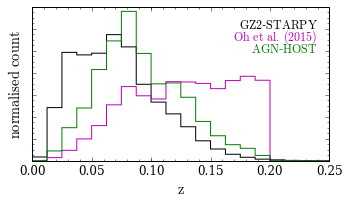

In [62]:
P.figure(figsize=(5,3))
P.hist(data['z_1'], range = ([0,0.25]), histtype='step', color='k', bins=20, label='GZ2 starpy sample', normed=True)
P.hist(oh['redshift'], range = ([0,0.25]), histtype='step', color='m', bins=20, label='Oh et al. (2015) sample', normed=True)
P.hist(agn['col7'], range = ([0,0.25]), histtype='step', color='g', bins=20, label='GZ2-Oh match', normed=True)
P.text(0.24, 12, r'$\rm{GZ}2$-$\rm{STARPY}$', color='k', ha='right')
P.text(0.24, 10.9, r'$\rm{Oh}$ $\rm{et}$ $\rm{al.}$ $(2015)$', color='m', ha='right')
P.text(0.24, 9.8, r'$\rm{AGN}$-$\rm{HOST}$', color='g', ha='right')
P.tick_params('y', labelleft='off')
P.minorticks_on()
P.xlabel(r'$\rm{z}$')
P.ylabel(r'$\rm{normalised}$ $\rm{count}$')
P.tight_layout()
P.savefig('redshift_comparison_oh_gz2.png', edgecolor='None', facecolor='None')

In [88]:
len(data[N.where(N.logical_and(agn['col7']>0.15,  agn['col7']<0.25))])/float(len(agn))

0.06707317073170732

In [192]:
D_L_term = agn['col283'] - agn['col297']
abs_m_gal = agn['r gal'] - D_L_term
N.min(agn['redshift'])

0.0159572008997

1.0


/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


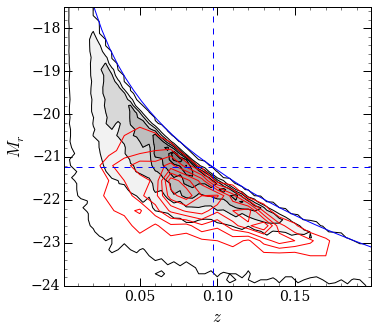

In [244]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')

z = N.linspace(0.00, 0.25, 50)
mmr = N.zeros_like(z)
v = N.zeros_like(z)
for n in range(len(z)):
    if z[n] < 0.1:
        mmr[n] = -21.3 -5.5*N.log10(z[n]/0.1)
    else:
        mmr[n] = -21.3 -6*N.log10(z[n]/0.1)
    v[n] = len(agn[N.where(N.logical_and(agn['redshift'] < z[n], agn['col297'] < (mmr[n])))])
# v = N.zeros_like(z)
# mmr = N.zeros_like(z)
# for n in range(len(z)-1):
#     mmr[n] = N.max(agn['col297'][N.where(N.logical_and(agn['redshift'] > z[n], agn['redshift'] < z[n+1]))])
#     v[n] = len(agn[N.where(N.logical_and(agn['redshift'] < z[n], agn['col297'] < (mmr[n])))])


Hs, Xs, Ys = np.histogram2d(agn['redshift'], agn['col297'], bins=20, range=([0,0.2],[-24,-17]))
H, X, Y = np.histogram2d(data['REDSHIFT_1'],data['MR'], bins=50, range=([0,0.2],[-24,-17]))
print N.min(H[N.nonzero(H)])
P.figure(figsize=(5.5,5))
P.contour(X[:-1], Y[:-1], H.T, origin='lower', colors='k', levels=[1, 100, 200, 300, 400, 500, 550, 596])
P.contourf(X[:-1], Y[:-1], H.T, origin='lower', cmap=P.cm.binary, alpha=0.5, levels=[100, 200, 300, 400, 500, 550, 596])
P.contour(Xs[:-1], Ys[:-1], Hs.T, origin='lower', colors='r')
P.axvline(z[N.argmax(v)], color='b', linestyle='dashed')
P.axhline(mmr[N.argmax(v)], color='b', linestyle='dashed')
P.plot(z, mmr, color='b')
P.ylim(-17, -24)
P.minorticks_on()
P.tick_params('both', which='major', length=8, width=1)
P.tick_params('both', which='minor', length=3, width=0.5)
P.xlabel(r'$z$')
P.ylabel(r'$M_r$')
P.xlim(0.001, 0.199)
P.ylim(-24, -17.5)
P.savefig('volume_lim_sample.png')

In [245]:
print z[N.argmax(v)]
print N.max(v)
print mmr[N.argmax(v)]

0.0969387755102
423.0
-21.2257364128


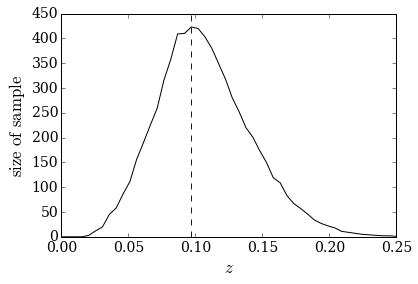

In [262]:
P.plot(z, v, c='k')
P.axvline(z[N.argmax(v)], color='b', linestyle='dashed')
P.xlabel(r'$z$')
P.ylabel(r'$\rm{size}$ $\rm{of}$ $\rm{sample}$')

In [247]:
s = agn[N.where(N.logical_and(agn['redshift']< z[N.argmax(v)],agn['col297']<mmr[N.argmax(v)]))]

In [311]:
ur_gal = agn['u - r']
log_m_l = np.zeros(len(ur_gal))
m_msun = np.zeros_like(log_m_l)
D_L_term = agn['col283'] - agn['col297']
abs_m_gal = agn['r gal'] - D_L_term
for j in range(len(log_m_l)):
    if ur_gal[j] <=2.1:
        log_m_l[j] = -0.95 + 0.56 * ur_gal[j]
    else:
        log_m_l[j] = -0.16 + 0.18 * ur_gal[j]
    m_msun[j] = (((4.62 - abs_m_gal[j])/2.5) + log_m_l[j])
m_msun_s = m_msun[N.where(N.logical_and(agn['redshift']< z[N.argmax(v)],agn['col297']<mmr[N.argmax(v)]))]

0.0472813238771
0.269503546099
0.683215130024


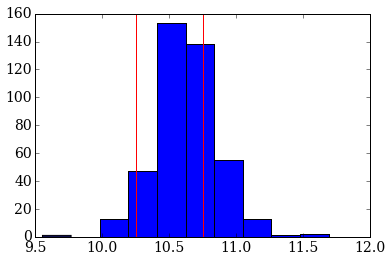

In [312]:
P.hist(m_msun_s)
P.axvline(10.25, c='r')
P.axvline(10.75, c='r')
print len(agn[m_msun_s< 10.25])/float(len(s))
print len(agn[m_msun_s> 10.75])/float(len(s))
print (len(m_msun_s) - len(agn[m_msun_s< 10.25]) - len(agn[m_msun_s> 10.75]))/float(len(s))

In [259]:
s.write('/Users/becky/Projects/followup_gv/oh_sample/agn_oh_sample_gz2_match_gal_mag_5px_3px_volume_limited.fits', format='fits')

In [314]:
low = agn[m_msun < 10.25]
med = agn[N.where(N.logical_and(m_msun > 10.25 , m_msun < 10.75))]
high = agn[m_msun > 10.75]

In [315]:
print N.mean(low['redshift'])
print N.mean(med['redshift'])
print N.mean(high['redshift'])

0.0611208072431
0.087715383606
0.109874111656


In [316]:
from astropy.cosmology import FlatLambdaCDM

In [317]:
cosmo = FlatLambdaCDM(H0 = 71.0, Om0 = 0.26)
print cosmo.age(N.mean(low['redshift']))
print cosmo.age(N.mean(med['redshift']))
print cosmo.age(N.mean(high['redshift']))

12.999890634 Gyr
12.6691614712 Gyr
12.4025191814 Gyr


(array([ 0.06895542,  0.19307517,  0.28961275,  0.55853888,  0.42062805,
         0.2965083 ,  0.12411975,  0.0827465 ,  0.02068663,  0.01379108]),
 array([ 0.48768767,  0.97109179,  1.45449592,  1.93790004,  2.42130417,
         2.9047083 ,  3.38811242,  3.87151655,  4.35492067,  4.8383248 ,
         5.32172892]),
 <a list of 1 Patch objects>)

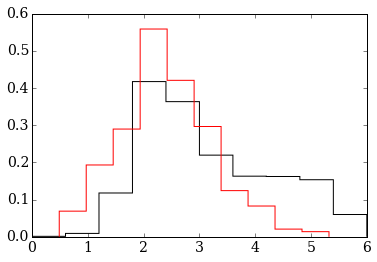

In [318]:
P.hist(data['NUV'] - data['G_1'], range=([0,6]), normed=True, color='k', histtype='step')
P.hist(high['nuv ab mag auto'] - high['col282'], normed=True, color='r', histtype='step')

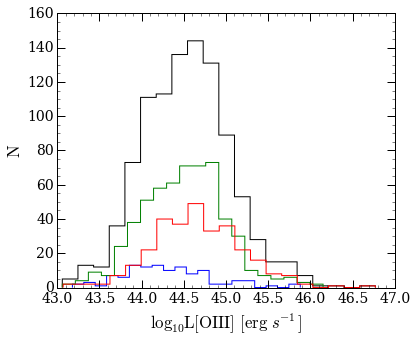

In [319]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')
P.figure(figsize=(6,5))
P.hist(agn['col362'], bins=20, histtype='step', color='k')
P.hist(low['col362'], bins=20, histtype='step', color='b')
P.hist(med['col362'], bins=20, histtype='step', color='g')
P.hist(high['col362'], bins=20, histtype='step', color='r')
P.xlabel(r'$\rm{log}_{10}L[OIII]$ $[\rm{erg}$ $s^{-1}]$')
P.ylabel(r'$\rm{N}$')
P.minorticks_on()
P.tick_params('both', which='major', length=8, width=1)
P.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('l_oiii_luminosity_low_med_high_mass_type1_agn.png', facecolor='None', edgecolor='None')

In [320]:
print 'all', N.mean(agn['col362'])
print 'low', N.mean(low['col362'])
print 'med', N.mean(med['col362'])
print 'high', N.mean(high['col362'])

all 44.5320426933
low 44.3024999755
med 44.5047202944
high 44.6698333486


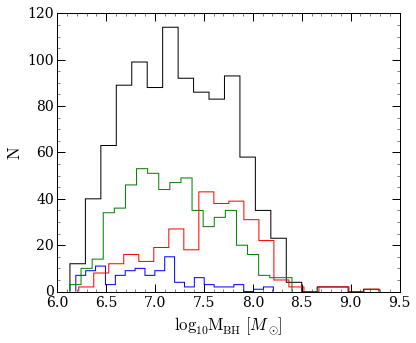

In [321]:
font = {'family':'serif', 'size':14}
P.rc('font', **font)
P.rc('xtick', labelsize='medium')
P.rc('ytick', labelsize='medium')
P.rc('axes', labelsize='large')
P.figure(figsize=(6,5))
P.hist(agn['col359'], bins=20, histtype='step', color='k')
P.hist(low['col359'], bins=20, histtype='step', color='b')
P.hist(med['col359'], bins=20, histtype='step', color='g')
P.hist(high['col359'], bins=20, histtype='step', color='r')
P.xlabel(r'$\rm{log}_{10}M_{BH}$ $[M_{\odot}]$')
P.ylabel(r'$\rm{N}$')
P.minorticks_on()
P.tick_params('both', which='major', length=8, width=1)
P.tick_params('both', which='minor', length=3, width=0.5)
P.tight_layout()
P.savefig('mbh_low_med_high_mass_type1_agn.png', facecolor='None', edgecolor='None')

In [322]:
print 'all', N.mean(agn['col359'])
print 'low', N.mean(low['col359'])
print 'med', N.mean(med['col359'])
print 'high', N.mean(high['col359'])

all 7.24804877605
low 6.92714285425
med 7.17330420184
high 7.51036664168


In [323]:
print 'all', N.mean(m_msun)
print 'low', N.mean(m_msun[m_msun < 10.25])
print 'med', N.mean(m_msun[N.where(N.logical_and(m_msun > 10.25 , m_msun < 10.75))])
print 'high', N.mean(m_msun[m_msun > 10.75])

all 10.6009002947
low 10.0684911068
med 10.5362870057
high 10.9228623957


In [393]:
p = N.polyfit(N.log10(10**agn['col362']/10**m_msun), agn['nuv - u 5px'], 1)
print p
x = N.linspace(31, 37, 20)
y = p[1]+p[0]*x
print x, y

[ -0.63681709  22.66558091]
[ 31.          31.31578947  31.63157895  31.94736842  32.26315789
  32.57894737  32.89473684  33.21052632  33.52631579  33.84210526
  34.15789474  34.47368421  34.78947368  35.10526316  35.42105263
  35.73684211  36.05263158  36.36842105  36.68421053  37.        ] [ 2.9242512   2.72315107  2.52205093  2.3209508   2.11985067  1.91875053
  1.7176504   1.51655027  1.31545013  1.11435     0.91324987  0.71214974
  0.5110496   0.30994947  0.10884934 -0.0922508  -0.29335093 -0.49445106
 -0.69555119 -0.89665133]


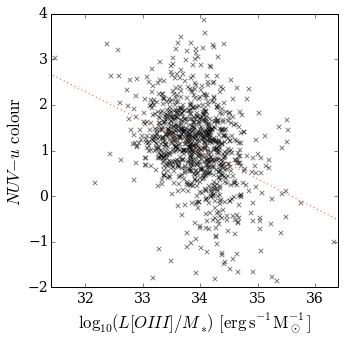

In [384]:
P.figure(figsize=(5,5))
P.scatter(N.log10(10**agn['col362']/10**m_msun), agn['nuv - u 5px'], marker='x', color='k', alpha=0.5)
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$NUV - u$ $\rm{colour}$')
P.ylim(-2,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_nuv_colour_type1.png', edgecolor='None', facecolor='None')

In [392]:
H, X, Y = N.histogram2d(N.log10(10**agn['col362']/10**m_msun), agn['nuv - u 5px'], range=([31.4, 36.4],[-2,4]), bins=15)

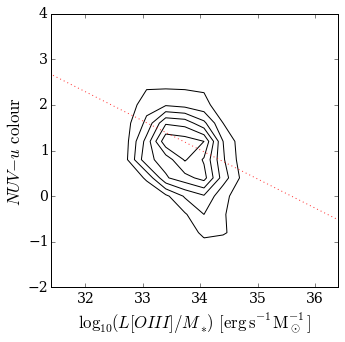

In [394]:
P.figure(figsize=(5,5))
P.contour(X[:-1], Y[:-1], H.T, orgin='lower', colors='k')
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$NUV-u$ $\rm{colour}$')
P.ylim(-2,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_colour_type1_nuv_contuor.png', edgecolor='None', facecolor='None')

In [387]:
p = N.polyfit(N.log10(10**agn['col362']/10**m_msun), agn['u - r'], 1)
print p
x = N.linspace(31, 37, 20)
y = p[1]+p[0]*x
print x, y

[-0.05933697  4.12228267]
[ 31.          31.31578947  31.63157895  31.94736842  32.26315789
  32.57894737  32.89473684  33.21052632  33.52631579  33.84210526
  34.15789474  34.47368421  34.78947368  35.10526316  35.42105263
  35.73684211  36.05263158  36.36842105  36.68421053  37.        ] [ 2.28283669  2.26409871  2.24536072  2.22662273  2.20788474  2.18914675
  2.17040876  2.15167077  2.13293278  2.11419479  2.0954568   2.07671881
  2.05798082  2.03924283  2.02050484  2.00176685  1.98302886  1.96429087
  1.94555288  1.92681489]


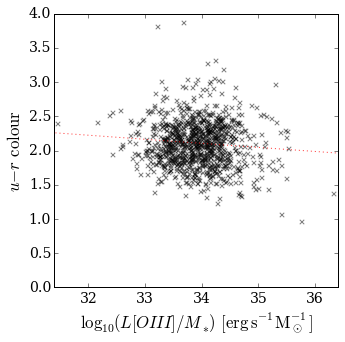

In [388]:
P.figure(figsize=(5,5))
P.scatter(N.log10(10**agn['col362']/10**m_msun), agn['u - r'], marker='x', color='k', alpha=0.5)
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$u-r$ $\rm{colour}$')
P.ylim(0,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_colour_type1.png', edgecolor='None', facecolor='None')

In [389]:
H, X, Y = N.histogram2d(N.log10(10**agn['col362']/10**m_msun), agn['u - r'], range=([31.4, 36.4],[0,4]), bins=15)

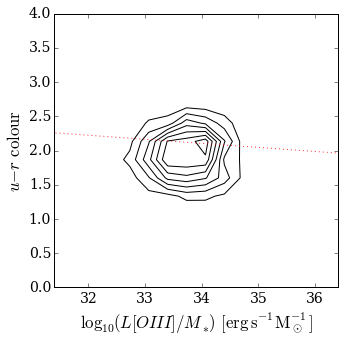

In [390]:
P.figure(figsize=(5,5))
P.contour(X[:-1], Y[:-1], H.T, orgin='lower', colors='k')
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$u-r$ $\rm{colour}$')
P.ylim(0,4)
P.xlim(31.4, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_colour_type1_contour.png', edgecolor='None', facecolor='None')

In [412]:
def lnlike(lim, agn):
    p2 = [-0.07173609, 3.97094353]
    ep2 = [0.02817512, 0.96001784]
    agns = agn[N.where(N.log10(10**agn['col362']/10**m_msun) < lim)]
    m_msun_s = m_msun[N.where(N.log10(10**agn['col362']/10**m_msun) < lim)]
    p = N.polyfit(N.log10(10**agns['col362']/10**m_msun_s), agns['nuv - u 5px'], 1)
    return -0.5*N.log(2*N.pi*ep2[0]**2)-0.5*((p2[0]-p[0])**2)/(ep2[0]**2)-0.5*N.log(2*N.pi*ep2[1]**2)-0.5*((p2[1]-p[1])**2)/(ep2[1]**2)

In [413]:
def lnprior(lim):
    if lim > 36:
        return -N.inf
    else:
        return 0

In [414]:
import emcee 
ndim, nwalkers = 1, 10
p0 = [np.random.rand(ndim)+34 for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnlike, args=[agn])
sampler.run_mcmc(p0, 500)
samples = sampler.chain.reshape((-1, ndim))

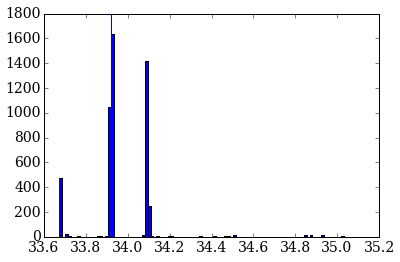

In [441]:
P.hist(samples, bins=100)
P.axvline(N.median(samples[:,0]))

(33.9, 33.94)

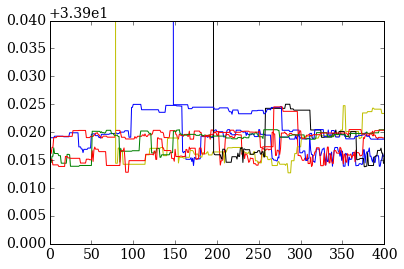

In [468]:
s = samples.reshape((nwalkers,500, ndim))
for n in range(nwalkers):
    P.plot(s[n, 100:,0])
P.ylim(33.9, 33.94)

In [443]:
agns = agn[N.where(N.log10(10**agn['col362']/10**m_msun) < N.median(samples[:,0]))]
m_msun_s = m_msun[N.where(N.log10(10**agn['col362']/10**m_msun) < N.median(samples[:,0]))]

In [446]:
p = N.polyfit(N.log10(10**agns['col362']/10**m_msun_s), agns['nuv - u 5px'], 1)
print p
x = N.linspace(31, 35, 20)
y = p[1]+p[0]*x

[ -0.33851854  12.67566613]


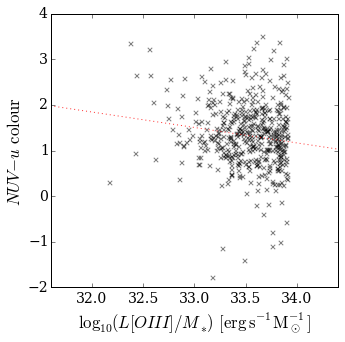

In [448]:
P.figure(figsize=(5,5))
P.scatter(N.log10(10**agns['col362']/10**m_msun_s), agns['nuv - u 5px'], marker='x', color='k', alpha=0.5)
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$NUV - u$ $\rm{colour}$')
P.ylim(-2,4)
P.xlim(31.6, 34.4)
P.tight_layout()
P.savefig('lum_over_mass_against_nuv_colour_type1_limited.png', edgecolor='None', facecolor='None')

In [449]:
len(agns)

485

678
984


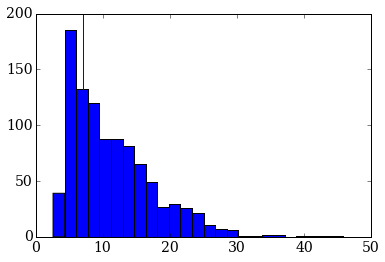

In [484]:
P.hist(agn['col278'], bins=25)
P.axvline(7)
agnsh = agn[agn['col278'] >7]
m_msun_sh = m_msun[agn['col278'] >7]

In [489]:
p = N.polyfit(N.log10(10**agnsh['col362']/10**m_msun_sh), agnsh['nuv - u 5px'], 1)
print p
x = N.linspace(31, 37, 20)
y = p[1]+p[0]*x
print x, y

[ -0.27959458  10.8109227 ]
[ 31.          31.31578947  31.63157895  31.94736842  32.26315789
  32.57894737  32.89473684  33.21052632  33.52631579  33.84210526
  34.15789474  34.47368421  34.78947368  35.10526316  35.42105263
  35.73684211  36.05263158  36.36842105  36.68421053  37.        ] [ 2.14349087  2.05519784  1.96690482  1.87861179  1.79031877  1.70202575
  1.61373272  1.5254397   1.43714668  1.34885365  1.26056063  1.1722676
  1.08397458  0.99568156  0.90738853  0.81909551  0.73080248  0.64250946
  0.55421644  0.46592341]


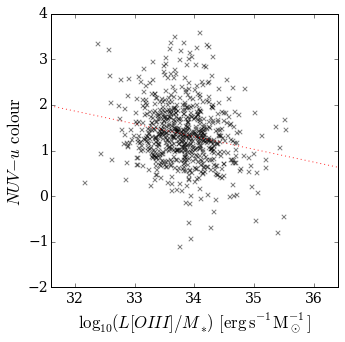

In [490]:
P.figure(figsize=(5,5))
P.scatter(N.log10(10**agnsh['col362']/10**m_msun_sh), agnsh['nuv - u 5px'], marker='x', color='k', alpha=0.5)
P.plot(x,y, c='r', alpha=0.8, linestyle='dotted')
P.xlabel(r'$\log_{10}(L[OIII]/M_{*})$ $[\rm{erg}^{ }s^{-1}M_{\odot}^{-1}]$')
P.ylabel(r'$NUV - u$ $\rm{colour}$')
P.ylim(-2,4)
P.xlim(31.6, 36.4)
P.tight_layout()
P.savefig('lum_over_mass_against_nuv_colour_type1_size_lim_gtr_7.png', edgecolor='None', facecolor='None')

In [559]:
b = Table.read('/Users/becky/Projects/followup_gv/bpt/bpt_identified_type2_agn_hard_cuts_GZ2_GALEX_match_Halpha_EW.fits', format='fits')

In [562]:
from astropy.table import Column
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0 = 71.0, Om0 = 0.26)
d = cosmo.luminosity_distance(b['REDSHIFT']) * 3.08567758E16 * 1E6 * 100
print d
L= Column(name ='lum oiii', data = (1E-17)*b['oiii_5007_flux']*5007*4*N.pi*(d.value**2), unit=u.erg / u.s)

[  9.72705406e+26   1.69566083e+27   9.47592937e+26 ...,   4.84458222e+26
   1.68916805e+27   1.23097164e+27] Mpc


In [571]:
p = N.polyfit(agn['col362'], agn['nuv gal 5px'], 1)
print p
x = N.linspace(42, 47, 20)
y = p[1]+p[0]*x
print x, y

p1 = N.polyfit(agnsh['col362'], agnsh['nuv gal 5px'], 1)
x1 = N.linspace(42, 47, 20)
y1 = p1[1]+p1[0]*x1

p2 = N.polyfit(N.log10(L), b['NUV'], 1)
x2 = N.linspace(42, 47, 20)
y2 = p2[1]+p2[0]*x2

p3 = N.polyfit(agns['col362'], agns['nuv gal 5px'], 1)
x3 = N.linspace(42, 47, 20)
y3 = p3[1]+p3[0]*x3


[ -0.12142923  25.14883878]
[ 42.          42.26315789  42.52631579  42.78947368  43.05263158
  43.31578947  43.57894737  43.84210526  44.10526316  44.36842105
  44.63157895  44.89473684  45.15789474  45.42105263  45.68421053
  45.94736842  46.21052632  46.47368421  46.73684211  47.        ] [ 20.04881101  20.01685595  19.98490089  19.95294583  19.92099077
  19.88903571  19.85708065  19.82512558  19.79317052  19.76121546
  19.7292604   19.69730534  19.66535028  19.63339522  19.60144016
  19.56948509  19.53753003  19.50557497  19.47361991  19.44166485]


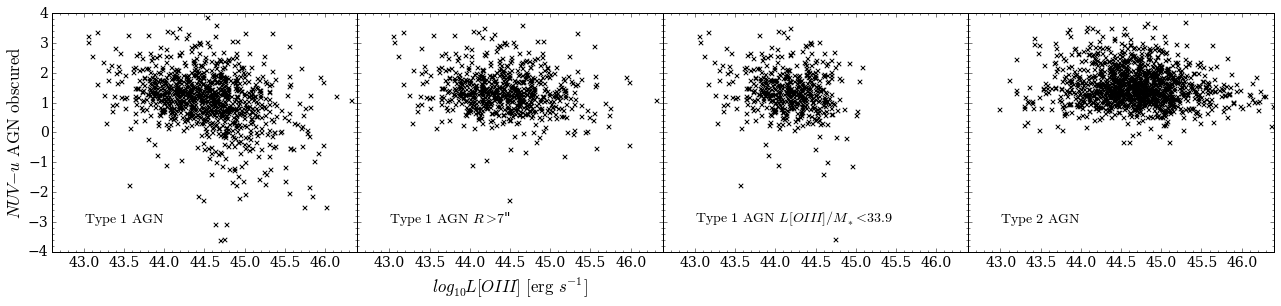

In [600]:
P.figure(figsize=(18,4.5))
ax1 = P.subplot(141)
ax1.scatter(agn['col362'], agn['nuv - u 5px'], marker='x', c='k')
#ax1.plot(x, y, c='r', linestyle='dotted')
ax1.set_ylim(-4, 4)
ax1.set_xlim(42.6, 46.4)
ax1.minorticks_on()
ax1.set_ylabel(r'$NUV-u$ $\rm{AGN}$ $\rm{obscured}$')
ax1.text(43.0, -3, r'$\rm{Type}$ $1$ $\rm{AGN}$')
ax2 = P.subplot(142)
ax2.scatter(agnsh['col362'], agnsh['nuv - u 5px'], marker='x', c='k')
#ax2.plot(x1, y1, c='r', linestyle='dotted')
ax2.set_ylim(-4, 4)
ax2.set_xlim(42.6, 46.4)
ax2.tick_params('y', labelleft='off')
ax2.text(43.0, -3, r'$\rm{Type}$ $1$ $\rm{AGN}$ $R > 7$"')
ax2.minorticks_on()
ax2.set_xlabel(r'$log_{10}L[OIII]$ $[\rm{erg}$ $s^{-1}]$')
ax3 = P.subplot(143)
ax3.scatter(agns['col362'], agns['nuv - u 5px'], marker='x', c='k')
#ax3.plot(x3, y3, c='r', linestyle='dotted')
ax3.set_ylim(-4, 4)
ax3.set_xlim(42.6, 46.4)
ax3.text(43.0, -3, r'$\rm{Type}$ $1$ $\rm{AGN}$ $L[OIII]/M_* < 33.9$')
ax3.tick_params('y', labelleft='off')
ax3.minorticks_on()
ax4 = P.subplot(144)
ax4.scatter(N.log10(L), b['NUV_U'], marker='x', c='k')
#ax4.plot(x2, y2, c='r', linestyle='dotted')
ax4.set_ylim(-4, 4)
ax4.set_xlim(42.6, 46.4)
ax4.text(43.0, -3, r'$\rm{Type}$ $2$ $\rm{AGN}$')
ax4.tick_params('y', labelleft='off')
ax4.minorticks_on()
P.tight_layout()
P.subplots_adjust(wspace=0.0)
P.savefig('comparison_nuv_u_colours_with_loiii.png', facecolor='None', edgecolor='None')

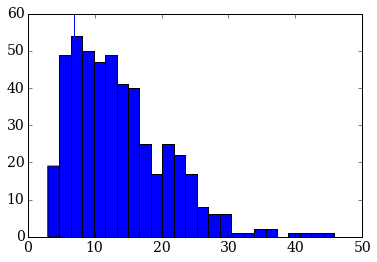

In [584]:
P.hist(agns['col278'], bins=25)
P.axvline(7)
lim_agn = agns[N.where(agns['col278']>7)]

In [585]:
p = N.polyfit(agn['col362'], agn['nuv gal 5px'], 1)
print p
x = N.linspace(42, 47, 20)
y = p[1]+p[0]*x
print x, y

p1 = N.polyfit(agnsh['col362'], agnsh['nuv gal 5px'], 1)
x1 = N.linspace(42, 47, 20)
y1 = p1[1]+p1[0]*x1

p2 = N.polyfit(N.log10(L), b['NUV'], 1)
x2 = N.linspace(42, 47, 20)
y2 = p2[1]+p2[0]*x2

p3 = N.polyfit(lim_agn['col362'], lim_agn['nuv gal 5px'], 1)
x3 = N.linspace(42, 47, 20)
y3 = p3[1]+p3[0]*x3


[ -0.12142923  25.14883878]
[ 42.          42.26315789  42.52631579  42.78947368  43.05263158
  43.31578947  43.57894737  43.84210526  44.10526316  44.36842105
  44.63157895  44.89473684  45.15789474  45.42105263  45.68421053
  45.94736842  46.21052632  46.47368421  46.73684211  47.        ] [ 20.04881101  20.01685595  19.98490089  19.95294583  19.92099077
  19.88903571  19.85708065  19.82512558  19.79317052  19.76121546
  19.7292604   19.69730534  19.66535028  19.63339522  19.60144016
  19.56948509  19.53753003  19.50557497  19.47361991  19.44166485]


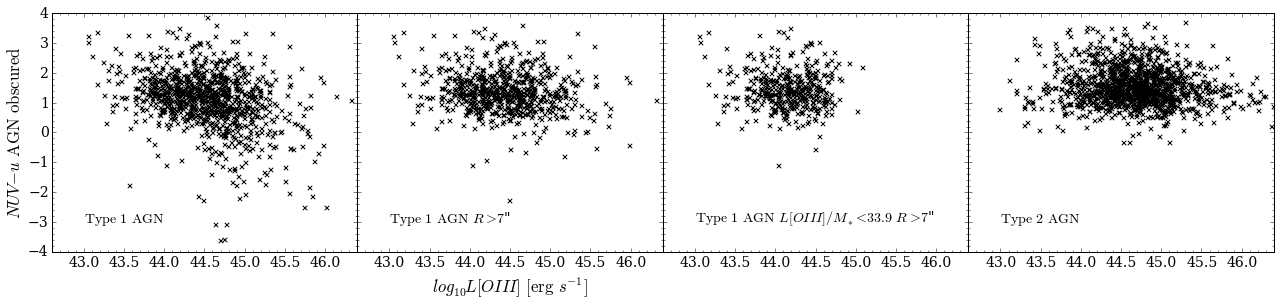

In [599]:
P.figure(figsize=(18,4.5))
ax1 = P.subplot(141)
ax1.scatter(agn['col362'], agn['nuv - u 5px'], marker='x', c='k')
#ax1.plot(x, y, c='r', linestyle='dotted')
ax1.set_ylim(-4, 4)
ax1.set_xlim(42.6, 46.4)
ax1.minorticks_on()
ax1.set_ylabel(r'$NUV-u$ $\rm{AGN}$ $\rm{obscured}$')
ax1.text(43.0, -3, r'$\rm{Type}$ $1$ $\rm{AGN}$')
ax2 = P.subplot(142)
ax2.scatter(agnsh['col362'], agnsh['nuv - u 5px'], marker='x', c='k')
#ax2.plot(x1, y1, c='r', linestyle='dotted')
ax2.set_ylim(-4, 4)
ax2.set_xlim(42.6, 46.4)
ax2.tick_params('y', labelleft='off')
ax2.text(43.0, -3, r'$\rm{Type}$ $1$ $\rm{AGN}$ $R > 7$"')
ax2.minorticks_on()
ax2.set_xlabel(r'$log_{10}L[OIII]$ $[\rm{erg}$ $s^{-1}]$')
ax3 = P.subplot(143)
ax3.scatter(lim_agn['col362'], lim_agn['nuv - u 5px'], marker='x', c='k')
#ax3.plot(x3, y3, c='r', linestyle='dotted')
ax3.set_ylim(-4, 4)
ax3.set_xlim(42.6, 46.4)
ax3.text(43.0, -3, r'$\rm{Type}$ $1$ $\rm{AGN}$ $L[OIII]/M_* < 33.9$ $R > 7$"')
ax3.tick_params('y', labelleft='off')
ax3.minorticks_on()
ax4 = P.subplot(144)
ax4.scatter(N.log10(L), b['NUV_U'], marker='x', c='k')
#ax4.plot(x2, y2, c='r', linestyle='dotted')
ax4.set_ylim(-4, 4)
ax4.set_xlim(42.6, 46.4)
ax4.text(43.0, -3, r'$\rm{Type}$ $2$ $\rm{AGN}$')
ax4.tick_params('y', labelleft='off')
ax4.minorticks_on()
P.tight_layout()
P.subplots_adjust(wspace=0.0)
P.savefig('comparison_nuv_u_colours_with_loiii_lim_agn.png', facecolor='None', edgecolor='None')

In [603]:
len(agns)

485

In [608]:
m_msun_lim = m_msun_s[N.where(agns['col278']>7)]

(array([   3.,   11.,   31.,   67.,  104.,  108.,   55.,   20.,    3.,    2.]),
 array([  9.79472413,   9.97478723,  10.15485033,  10.33491343,
         10.51497653,  10.69503963,  10.87510273,  11.05516583,
         11.23522893,  11.41529203,  11.59535513]),
 <a list of 10 Patch objects>)

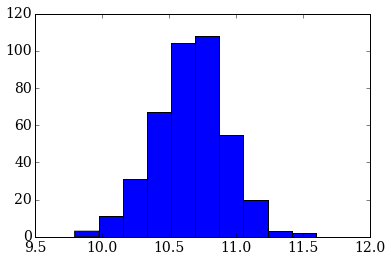

In [613]:
P.hist(m_msun_lim)

In [614]:
print np.median(lim_agn['u - r'])
print np.mean(lim_agn['u - r'])
print np.median(lim_agn['u - r err'])
print np.mean(lim_agn['u - r err'])
print np.median(lim_agn['nuv - u 5px'])
print np.mean(lim_agn['nuv - u 5px'])
print np.median(lim_agn['nuv - u 5px err'])
print np.mean(lim_agn['nuv - u 5px err'])

2.05176178932
2.07756426388
0.0441697996852
0.105016098654
1.37123262291
1.43776533912
0.0514654641047
0.112312984852


In [615]:
print np.median(agnsh['u - r'])
print np.mean(agnsh['u - r'])
print np.median(agnsh['u - r err'])
print np.mean(agnsh['u - r err'])
print np.median(agnsh['nuv - u 5px'])
print np.mean(agnsh['nuv - u 5px'])
print np.median(agnsh['nuv - u 5px err'])
print np.mean(agnsh['nuv - u 5px err'])

2.05278322915
2.06352463303
0.0468455424473
0.101425985827
1.31098587186
1.35375190726
0.0557680335994
0.108593363708
